In [38]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

**Reading and Understanding Data**

In [39]:
# Importing dataset
data = pd.read_csv('Titanic_coursework_entire_dataset_23-24.csv')

In [40]:
# Displaying the first few 5 rows of dataset
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival
0,1,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [41]:
# Checking shape of dataset
data.shape

(890, 11)

In [42]:
# Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Pclass       888 non-null    float64
 2   Name         890 non-null    object 
 3   Sex          890 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        890 non-null    int64  
 6   Parch        890 non-null    int64  
 7   Ticket       890 non-null    object 
 8   Fare         890 non-null    float64
 9   Embarked     888 non-null    object 
 10  Survival     890 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 76.6+ KB


**Data Preprocessing**

In [43]:
# Finding missing values
data.isnull().sum()

PassengerId      0
Pclass           2
Name             0
Sex              0
Age            176
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Survival         0
dtype: int64

In [44]:
# Filling missing values

# Filling Null Values in Pclass column with mean values of Pclass column
data['Pclass'].fillna(data['Pclass'].mean(),inplace=True)

# Filling Null Values in Age column with mean values of age column
data['Age'].fillna(data['Age'].mean(),inplace=True)

# Filling null values in Embarked Column with mode values of embarked column
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survival       0
dtype: int64

In [45]:
# Finding duplicate values
data.duplicated().sum()

0

In [46]:
# Dropping Unnecessary Columns
data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Survival'],
      dtype='object')

**Data Visualization**

In [47]:
# Displaying numeric data
data.describe()

,Pclass,Age,SibSp,Parch,Fare,Survival
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,2.306306,29.699118,0.523596,0.382022,32.231521,0.384270
std,0.835573,13.009326,1.103224,0.806409,49.714678,0.486696
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [48]:
# Displaying categorical data
data.describe(include='O')

,Sex,Embarked
count,890,890
unique,2,3
top,male,S
freq,576,645


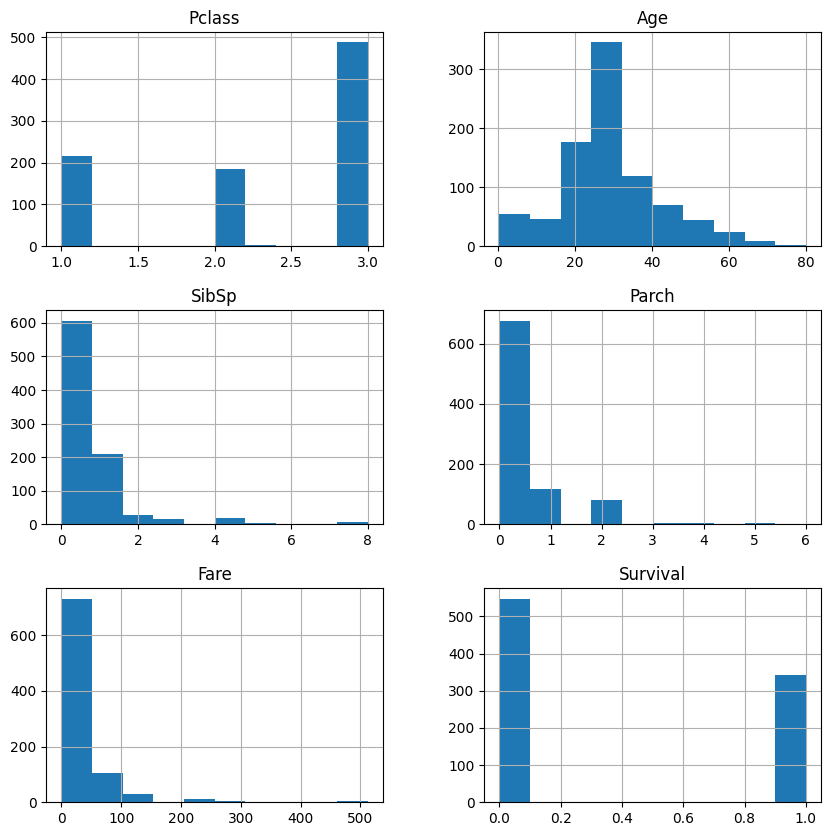

In [49]:
#Plotting matplotlib histogram
data.hist(figsize=(10,10))
plt.show()

In [50]:
# Survival count
data['Survival'].value_counts()

0    548
1    342
Name: Survival, dtype: int64

'0' for No and '1' for Yes

<Axes: ylabel='Survival'>

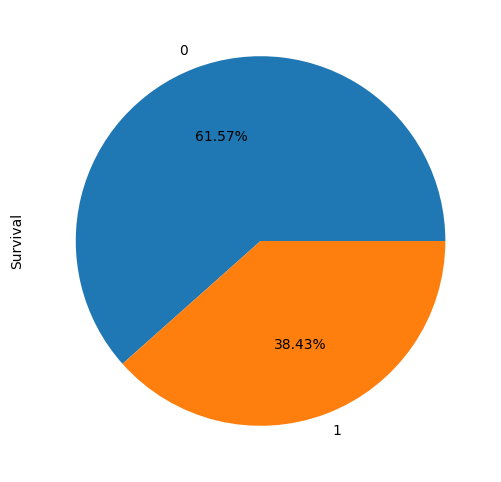

In [51]:
# Plotting survival ratio
fig = plt.figure(figsize=(6,6))
data['Survival'].value_counts().plot.pie(autopct = '%1.2f%%')

In [52]:
# Count male and female
data['Sex'].value_counts()

male      576
female    314
Name: Sex, dtype: int64

In sex(gender) column '0' represents female and '1' represents male

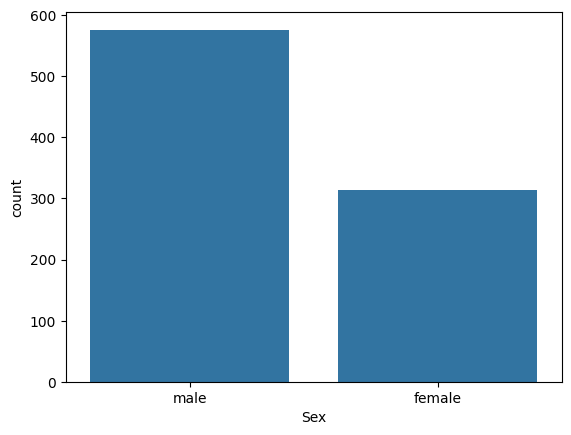

In [53]:
# Plotting male and female
sns.countplot(x='Sex',data=data)
plt.show()

In [54]:
# Count Embarked
data['Embarked'].value_counts()

S    645
C    168
Q     77
Name: Embarked, dtype: int64

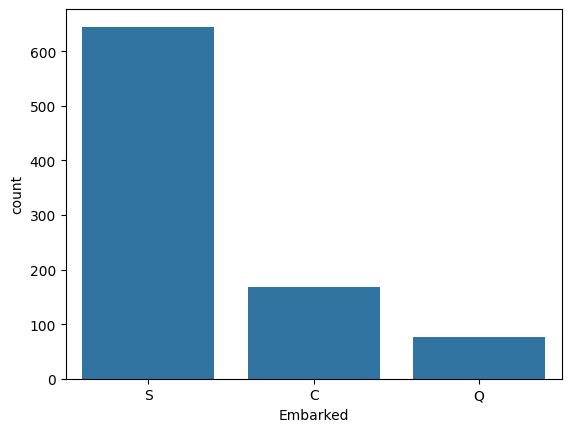

In [55]:
# Plotting Embarked
sns.countplot(x='Embarked',data=data)
plt.show()

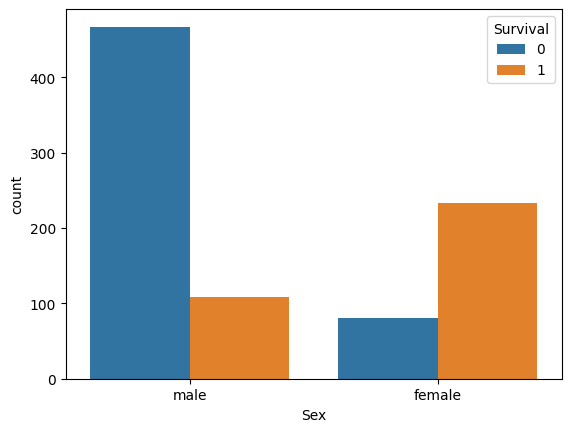

In [56]:
# Relationship between sex (Gender) and survival
sns.countplot(x='Sex',hue='Survival',data=data)
plt.show()

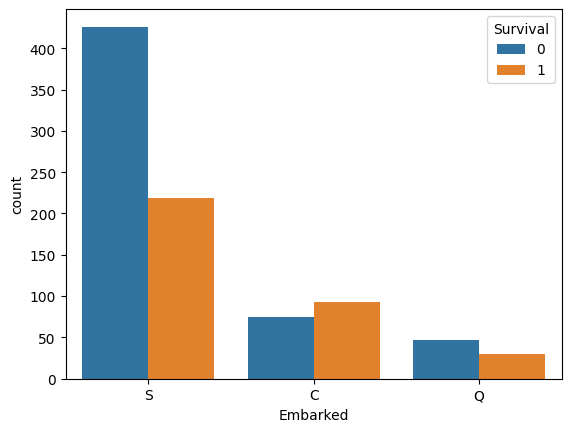

In [57]:
# Relationship between Embarked and survival
sns.countplot(x='Embarked',hue='Survival',data=data)
plt.show()

**Label Encoding**

In [58]:
# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply label encoding to categorical columns
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])


data.head()



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survival
0,3.0,1,22.0,1,0,7.2500,2,0
1,1.0,0,38.0,1,0,71.2833,0,1
2,3.0,0,26.0,0,0,7.9250,2,1
3,1.0,0,35.0,1,0,53.1000,2,1
4,3.0,1,35.0,0,0,8.0500,2,0


In Sex Column '0' represents 'female' and '1' represents 'male'
In Embarked Column '0' represents C, '1' represents 'Q' and '2' represents 'S'

**Data Modeling and Evaluation**


*   Baseline Model, strategy = "most_frequent"
*   Baseline Model, strategy = "uniform"
*   Naive Bayes
*   Support Vector Machine
*   Logistic Regression




In [59]:
# Split the data into features and target
X = data.drop(columns=["Survival"], axis=1)
y = data["Survival"]

In [60]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=240/650, random_state=42)

Baseline Model, strategy = "most_frequent"

In [61]:
# Create an instance of DummyClassifier
dummy_clf_1 = DummyClassifier(strategy="most_frequent", random_state=42)

# Fit the DummyClassifier to the training data
dummy_clf_1.fit(X_train, y_train)

# Predict on the testing data
y_pred = dummy_clf_1.predict(X_test)

# Calculate accuracy
accuracy_baseline_1 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing metrics
print(f"Accuracy of Baseline 1: {accuracy_baseline_1}")
print(f"Confusion Matrix of Baseline 1:\n{conf_matrix}")

Accuracy of Baseline 1: 0.6048632218844985
Confusion Matrix of Baseline 1:
[[199   0]
 [130   0]]


Baseline Model, strategy = "uniform"

In [62]:
# Create an instance of DummyClassifier
dummy_clf_2 = DummyClassifier(strategy="uniform", random_state=42)

# Fit the DummyClassifier to the training data
dummy_clf_2.fit(X_train, y_train)

# Predict on the testing data
y_pred = dummy_clf_2.predict(X_test)

# Calculate accuracy
accuracy_baseline_2 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing metrics
print(f"Accuracy of Baseline 2: {accuracy_baseline_2}")
print(f"Confusion Matrix of Baseline 2:\n{conf_matrix}")

Accuracy of Baseline 2: 0.48632218844984804
Confusion Matrix of Baseline 2:
[[ 97 102]
 [ 67  63]]


Support Vector Machine

In [63]:
# Create an instance of SVM
svm = SVC()

# Fit the Support Vector Machine to the training data
svm.fit(X_train, y_train)

# Predict on the testing data
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing metrics
print(f"Accuracy of Support Vector Machine: {accuracy_svm}")
print(f"Confusion Matrix of Support Vector Machine:\n{conf_matrix}")

Accuracy of Support Vector Machine: 0.668693009118541
Confusion Matrix of Support Vector Machine:
[[183  16]
 [ 93  37]]


Naive Bayes

In [64]:
# Create an instance of MultinomialNB
nb = MultinomialNB()

# Fit the DummyClassifier to the training data
nb.fit(X_train, y_train)

# Predict on the testing data
y_pred = nb.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing metrics
print(f"Accuracy of Naive Bayes: {accuracy_nb}")
print(f"Confusion Matrix of Naive Bayes:\n{conf_matrix}")


Accuracy of Naive Bayes: 0.7082066869300911
Confusion Matrix of Naive Bayes:
[[170  29]
 [ 67  63]]


Logistic Regression

In [65]:
# Create an instance of LogisticRegression
lr = LogisticRegression(max_iter = 1000)

# Fit the DummyClassifier to the training data
lr.fit(X_train, y_train)

# Predict on the testing data
y_pred = lr.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing metrics
print(f"Accuracy of Logistic Regression: {accuracy_lr}")
print(f"Confusion Matrix of Logistic Regression:\n{conf_matrix}")

Accuracy of Logistic Regression: 0.8267477203647416
Confusion Matrix of Logistic Regression:
[[173  26]
 [ 31  99]]


**Hyperparameter Tuning**

Hyperparameter Tuning of SVM

In [66]:
# defining parameter range
param_grid = {'C':  [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svm_grid = GridSearchCV(SVC(), param_grid, cv=30, verbose = 3, n_jobs=-1)

# fitting the model for grid search
svm_grid.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params = svm_grid.best_params_
best_estimator = svm_grid.best_estimator_

# Make predictions on the test data using the best model
y_pred_svm_tuned = best_estimator.predict(X_test)

# Evaluate the tuned Gradient Boosting Regression model
accuracy_svm_tuned = accuracy_score(y_test, y_pred_svm_tuned)
conf_matrix_svm_tuned = confusion_matrix(y_test, y_pred_svm_tuned)

print("Best Hyperparameters:", best_params)
print("Accuracy (Tuned SVM):", accuracy_svm_tuned)
print("Confusion Matrix (Tuned SVM):", conf_matrix_svm_tuned)



Fitting 30 folds for each of 25 candidates, totalling 750 fits
Best Hyperparameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy (Tuned SVM): 0.8054711246200608
Confusion Matrix (Tuned SVM): [[169  30]
 [ 34  96]]


Hyperparameter Tuning of Naive Bayes

In [67]:
# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
    'class_prior': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]],  # Vary class prior probabilities
    'fit_prior': [True, False],  # Whether to learn class prior probabilities or not
    'force_alpha': [False, True]  # Whether to set alpha to be consistent across classes or not
}
# Create GridSearchCV
nb_grid = GridSearchCV(nb, param_grid, cv=30, verbose=3, n_jobs=-1)

# Fit the model for grid search
nb_grid.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params = nb_grid.best_params_
best_estimator = nb_grid.best_estimator_

# Make predictions on the test data using the best model
y_pred_nb_tuned = best_estimator.predict(X_test)

# Evaluate the tuned Naive Bayes model
accuracy_nb_tuned = accuracy_score(y_test, y_pred_nb_tuned)
conf_matrix_nb_tuned = confusion_matrix(y_test, y_pred_nb_tuned)

print("Best Hyperparameters:", best_params)
print("Accuracy (Tuned Naive Bayes):", accuracy_nb_tuned)
print("Confusion Matrix (Tuned Naive Bayes):", conf_matrix_nb_tuned)

Fitting 30 folds for each of 80 candidates, totalling 2400 fits
Best Hyperparameters: {'alpha': 0.1, 'class_prior': [0.3, 0.7], 'fit_prior': True, 'force_alpha': False}
Accuracy (Tuned Naive Bayes): 0.7051671732522796
Confusion Matrix (Tuned Naive Bayes): [[167  32]
 [ 65  65]]


Hyperparameter Tuning of Logistic Regresssion

In [68]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty norm
    'solver': ['liblinear'],  # Solver algorithm
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}


# Create GridSearchCV
lr_grid = GridSearchCV(lr, param_grid, cv=30, verbose=3, n_jobs=-1)

# Fit the model for grid search
lr_grid.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params = lr_grid.best_params_
best_estimator = lr_grid.best_estimator_

# Make predictions on the test data using the best model
y_pred_lr_tuned = best_estimator.predict(X_test)

# Evaluate the tuned Logistic Regression model
accuracy_lr_tuned = accuracy_score(y_test, y_pred_lr_tuned)
conf_matrix_lr_tuned = confusion_matrix(y_test, y_pred_lr_tuned)

print("Best Hyperparameters:", best_params)
print("Accuracy (Tuned Logistic Regression):", accuracy_lr_tuned)
print("Confusion Matrix (Tuned Logistic Regression):", conf_matrix_lr_tuned)

Fitting 30 folds for each of 36 candidates, totalling 1080 fits
Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy (Tuned Logistic Regression): 0.8297872340425532
Confusion Matrix (Tuned Logistic Regression): [[173  26]
 [ 30 100]]


**Accuracies Plotting**

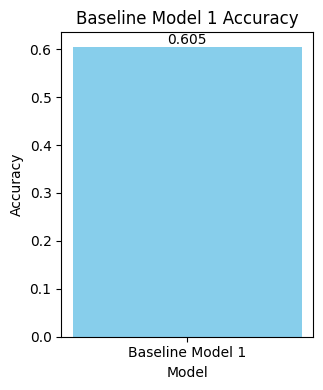

In [69]:
plt.figure(figsize=(6, 4))

# Plot Baseline Model 1 Accuracy
plt.subplot(1, 2, 1)
plt.bar("Baseline Model 1", accuracy_baseline_1, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Baseline Model 1 Accuracy')

# Add Baseline Model 1 Accuracy value on top of the bar
plt.text(0, accuracy_baseline_1, round(accuracy_baseline_1, 3), ha='center', va='bottom')
plt.tight_layout()
plt.show()

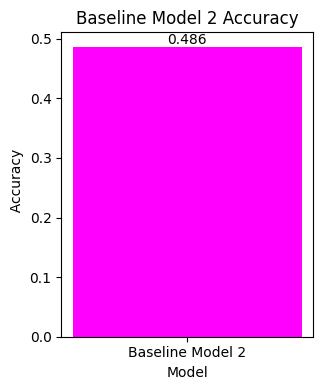

In [70]:
plt.figure(figsize=(6, 4))

# Plot Baseline Model 2 Accuracy
plt.subplot(1, 2, 1)
plt.bar("Baseline Model 2", accuracy_baseline_2, color='magenta')
plt.xlabel('Model')
plt.ylabel('  Accuracy')
plt.title('Baseline Model 2 Accuracy')

# Add Baseline Model 2 Accuracy value on top of the bar
plt.text(0, accuracy_baseline_2, round(accuracy_baseline_2, 3), ha='center', va='bottom')
plt.tight_layout()
plt.show()

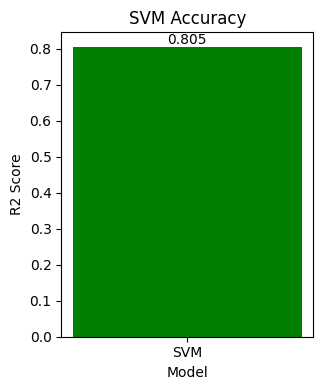

In [71]:
plt.figure(figsize=(6, 4))

# Plot SVM Accuracy
plt.subplot(1, 2, 1)
plt.bar("SVM", accuracy_svm_tuned, color='green')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('SVM Accuracy')

# Add SVM Accuracy value on top of the bar
plt.text(0, accuracy_svm_tuned, round(accuracy_svm_tuned, 3), ha='center', va='bottom')
plt.tight_layout()
plt.show()

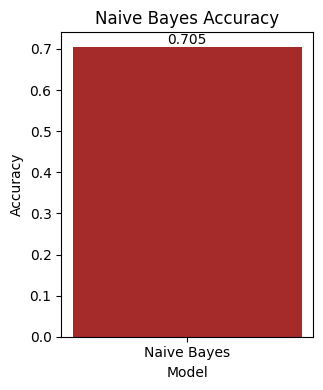

In [72]:
plt.figure(figsize=(6, 4))

# Plot Naive Bayes Accuracy
plt.subplot(1, 2, 1)
plt.bar("Naive Bayes", accuracy_nb_tuned, color='brown')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Accuracy')

# Add Naive Bayes Accuracy value on top of the bar
plt.text(0, accuracy_nb_tuned, round(accuracy_nb_tuned, 3), ha='center', va='bottom')
plt.tight_layout()
plt.show()

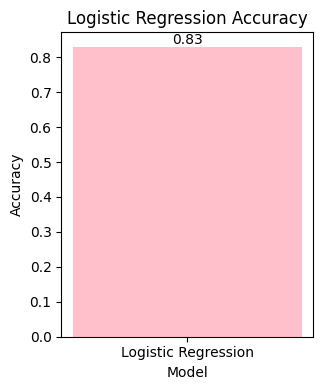

In [73]:
plt.figure(figsize=(6, 4))

# Plot Logistic Regression Accuracy
plt.subplot(1, 2, 1)
plt.bar("Logistic Regression", accuracy_lr_tuned, color='pink')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy')

# Add Logistic Regression Accuracy value on top of the bar
plt.text(0, accuracy_lr_tuned, round(accuracy_lr_tuned, 3), ha='center', va='bottom')
plt.tight_layout()
plt.show()

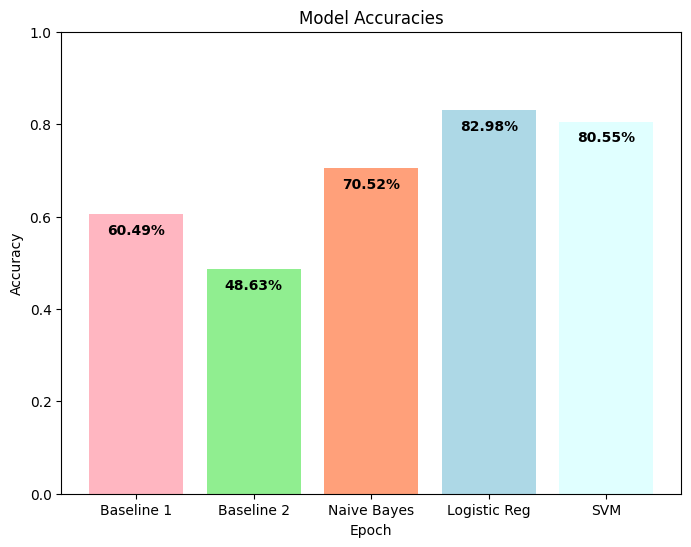

In [80]:
accuracies = [accuracy_baseline_1, accuracy_baseline_2, accuracy_nb_tuned, accuracy_lr_tuned, accuracy_svm_tuned]
models = ['Baseline 1', 'Baseline 2', 'Naive Bayes', 'Logistic Reg', 'SVM']

# Plotting the accuracies
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['lightpink', 'lightgreen', 'lightsalmon', 'lightblue', 'lightcyan'])

# Adding text on top of the bars with the percentage values
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{acc:.2%}',
             ha='center', va='bottom', color='black', fontweight='bold')

plt.title('Model Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to 0-1 for percentage values
plt.show()